In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
face = misc.face()

In [3]:
face.shape

(768, 1024, 3)

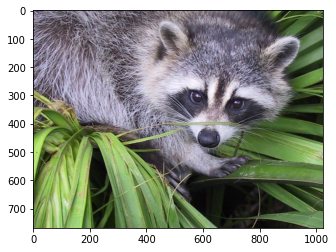

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(face)
plt.show()

In [5]:
## reshape the image so that it become 2d array 
new_face = (face / 255.0).reshape(-1, 3)
new_face.shape

(786432, 3)

In [6]:
## fit the model and compress it into 16 color 
kmeans = cluster.MiniBatchKMeans(16).fit(new_face)
## assign original data pt into corresponding cluster 
k_colors = kmeans.cluster_centers_[kmeans.predict(new_face)]

In [7]:
k_colors

array([[0.48480662, 0.45828705, 0.5078351 ],
       [0.56135363, 0.53528599, 0.58922344],
       [0.56135363, 0.53528599, 0.58922344],
       ...,
       [0.5276226 , 0.6462781 , 0.38157975],
       [0.5276226 , 0.6462781 , 0.38157975],
       [0.5276226 , 0.6462781 , 0.38157975]])

In [8]:
kmeans.predict(new_face)

array([ 5, 11, 11, ..., 13, 13, 13])

In [9]:
kmeans.cluster_centers_

array([[0.64366846, 0.61910093, 0.67974448],
       [0.28360237, 0.26007351, 0.29811967],
       [0.41369261, 0.53122247, 0.2929994 ],
       [0.1317768 , 0.15409179, 0.10121424],
       [0.84662589, 0.82898788, 0.88032637],
       [0.48480662, 0.45828705, 0.5078351 ],
       [0.66230285, 0.78926681, 0.47534203],
       [0.22450705, 0.30308247, 0.13816939],
       [0.73541114, 0.71396056, 0.77471444],
       [0.31626983, 0.42404318, 0.20996447],
       [0.06069038, 0.07113931, 0.04609922],
       [0.56135363, 0.53528599, 0.58922344],
       [0.35013267, 0.32459027, 0.36950121],
       [0.5276226 , 0.6462781 , 0.38157975],
       [0.20748073, 0.19135726, 0.2158049 ],
       [0.41527369, 0.38877428, 0.43720915]])

In [10]:
## reshape the compressed image 
k_img = k_colors.reshape(face.shape)
k_img

array([[[0.48480662, 0.45828705, 0.5078351 ],
        [0.56135363, 0.53528599, 0.58922344],
        [0.56135363, 0.53528599, 0.58922344],
        ...,
        [0.41369261, 0.53122247, 0.2929994 ],
        [0.41369261, 0.53122247, 0.2929994 ],
        [0.5276226 , 0.6462781 , 0.38157975]],

       [[0.35013267, 0.32459027, 0.36950121],
        [0.41527369, 0.38877428, 0.43720915],
        [0.48480662, 0.45828705, 0.5078351 ],
        ...,
        [0.41369261, 0.53122247, 0.2929994 ],
        [0.5276226 , 0.6462781 , 0.38157975],
        [0.5276226 , 0.6462781 , 0.38157975]],

       [[0.28360237, 0.26007351, 0.29811967],
        [0.35013267, 0.32459027, 0.36950121],
        [0.48480662, 0.45828705, 0.5078351 ],
        ...,
        [0.41369261, 0.53122247, 0.2929994 ],
        [0.5276226 , 0.6462781 , 0.38157975],
        [0.5276226 , 0.6462781 , 0.38157975]],

       ...,

       [[0.31626983, 0.42404318, 0.20996447],
        [0.41369261, 0.53122247, 0.2929994 ],
        [0.41369261, 0

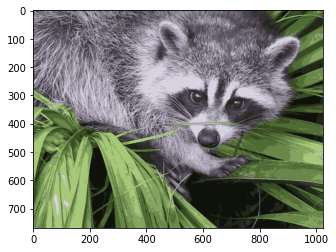

In [11]:
## plot the compressed result 
plt.gray()
plt.imshow(k_img)
plt.show()

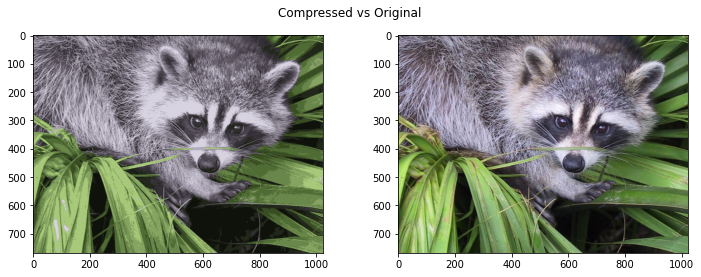

In [20]:
## compare two pictures
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,4))
fig.suptitle('Compressed vs Original')
plt.gray()
ax1.imshow(k_img)
ax2.imshow(face)